### Background

We are provided with a dataset of customer transactions with other KYC and behavioral information attached. As the outcome of the transaction there was tracking on whether the transaction resulted into a complaint or not.

### Objective

To develop a Machine Learning model to help predict whether customer will complain or not given a trail of transactional records

### 1. Importing Important packages

* <b>numpy</b> A python package for numerical analyses
* <b>pandas</b> A python package for data analysis
* <b>seaborn</b> A python package for visualizations

In [464]:
# Load packages
import numpy as np
import pandas as pd
import seaborn as sns

### 2. Data Loading and Cleaning

In [465]:
# Load data

df = pd.read_csv('store_complains_DS Interview Data Set.csv')

In [466]:
# Visualize features
df.columns

Index(['customer_registration_number', 'merchandize_category',
       'amount_deposited_via_counter', 'amount_deposited_via_card',
       'balance_on_complaign_date', 'transaction_date', 'complaint_date',
       'restaurant_points', 'fuel_points', 'groceries_points', 'toys_points',
       'cash_back_points', 'electronics', 'complained', 'Order_tyPe', 'amount',
       'quantity', 'card_vendor', 'used_coupon', 'product_discounted',
       'cust_age', 'cust_gender'],
      dtype='object')

In [467]:
# Preview dataframe
df.head()

,customer_registration_number,merchandize_category,amount_deposited_via_counter,amount_deposited_via_card,balance_on_complaign_date,transaction_date,complaint_date,restaurant_points,fuel_points,groceries_points,...,electronics,complained,Order_tyPe,amount,quantity,card_vendor,used_coupon,product_discounted,cust_age,cust_gender
0,64257fd79a53006421b72c3f,Breakfast,0.0,779.00,1272.00,2023-03-15,2023-03-29,0,0,0,...,0,YES,Other,1.0,1.0,Visa,No,no,49,Female
1,64257ffc9a53006421b72c40,Frozen,0.0,536.00,928.00,2023-03-15,2023-03-29,0,1,0,...,0,YES,Pickup,3000.0,1.0,Visa,No,no,82,Female
2,642580229a53006421b72c41,Alcohol,0.0,330225.00,177850.00,2023-03-15,2023-03-29,0,0,0,...,0,NO,Walk In,22000.0,1.0,Visa,No,no,35,Male
3,642580469a53006421b72c42,Baking,0.0,6215561.04,301542.04,2023-03-15,2023-03-29,3,0,1,...,0,NO,Walk In,1600000.0,5.0,Mastercard,No,YEs,95,Female
4,642580469a53006421b72c42,Alcohol,0.0,6215561.04,301542.04,2023-03-15,2023-03-29,3,0,1,...,0,NO,Walk In,1600000.0,5.0,Mastercard,No,YEs,95,Female


In [468]:
# Checking number of rows and columns
df.shape

(31924, 22)

In [469]:
# Getting more details - type and count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31924 entries, 0 to 31923
Data columns (total 22 columns):
customer_registration_number    31924 non-null object
merchandize_category            26843 non-null object
amount_deposited_via_counter    31924 non-null float64
amount_deposited_via_card       31924 non-null float64
balance_on_complaign_date       31924 non-null float64
transaction_date                31924 non-null object
complaint_date                  31924 non-null object
restaurant_points               31924 non-null int64
fuel_points                     31924 non-null int64
groceries_points                31924 non-null int64
toys_points                     31924 non-null int64
cash_back_points                31924 non-null int64
electronics                     31924 non-null int64
complained                      31924 non-null object
Order_tyPe                      31924 non-null object
amount                          31711 non-null float64
quantity                     

<b>Comment:</b> We have 31,924 rows in total. If all is well each column is supposed to have 31,924 non-null values. From above some columns have nulls we need to take care of. If nulls are 1% or less we will just delete the rows with nulls else we leave out the whole column/feature.

In [470]:
# Using some colors for enhanced visibility
import simple_colors

In [471]:
# Going through each feature to analyse for data completeness
for i in df.columns:
    if (100 * sum(df[i].isna())/df.shape[0]) == 0:
        print (i, simple_colors.green("has no nulls"))
    elif ((100 * sum(df[i].isna())/df.shape[0]) > 0) and ((100 * sum(df[i].isna())/df.shape[0]) <= 1):
        print (i, simple_colors.blue("has nulls less than 1% drop rows"))
    else:
        print (i, simple_colors.red("has significant nulls drop column"))

customer_registration_number has no nulls
merchandize_category has significant nulls drop column
amount_deposited_via_counter has no nulls
amount_deposited_via_card has no nulls
balance_on_complaign_date has no nulls
transaction_date has no nulls
complaint_date has no nulls
restaurant_points has no nulls
fuel_points has no nulls
groceries_points has no nulls
toys_points has no nulls
cash_back_points has no nulls
electronics has no nulls
complained has no nulls
Order_tyPe has no nulls
amount has nulls less than 1% drop rows
quantity has nulls less than 1% drop rows
card_vendor has no nulls
used_coupon has no nulls
product_discounted has no nulls
cust_age has no nulls
cust_gender has no nulls


In [472]:
# dropping merchandize category column
df.drop(columns=['merchandize_category'], inplace=True)

In [473]:
# dropping rows with nas
df.dropna(inplace=True)

In [474]:
# New dataframe - reduced some rows and one column
df.shape

(31463, 21)

### 3. Exploratory Data Analysis

We will try to go through some of key features to try to understand the dataset and feature's relevance ahead of fitting to the model

<strong>complained:</strong> an outcome variable for when a customer has a complain or not

In [475]:
# Number of complaints vs no complaints
df.complained.value_counts()

YES    18822
NO     12641
Name: complained, dtype: int64

<strong>customer_registration_number:</strong> a unique identifier per customer

From below it seems there are close to 24K customers. From the number of records some 3.7K customers have registered multiple complaints.

In [476]:
# Number of Customers 
df.customer_registration_number.nunique()

23710

In [477]:
# Customers who have complained more than once
np.sum(df[df.complained == "YES"].customer_registration_number.duplicated())

3770

<strong>amount_deposited_via_counter:</strong> From below plots it seems complaint instances or customers with complaints have relatively higher amount deposited via counter compaired to non complaint instances.

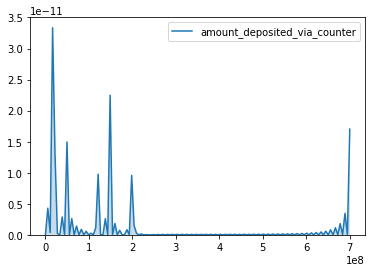

In [478]:
sns.kdeplot(df[df.complained == "YES"].amount_deposited_via_counter, shade=True)

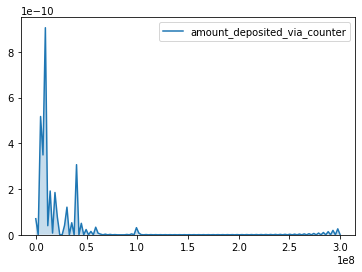

In [479]:
sns.kdeplot(df[df.complained == "NO"].amount_deposited_via_counter, shade=True)

<strong>amount_deposited_via_card:</strong> From below plots it again seems customers with complaints have relatively higher amount deposited via card.

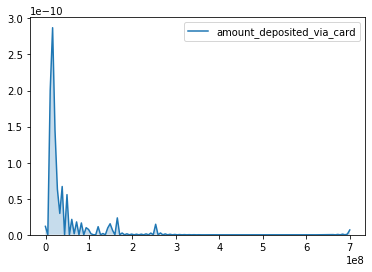

In [480]:
sns.kdeplot(df[df.complained == "YES"].amount_deposited_via_card , shade=True)

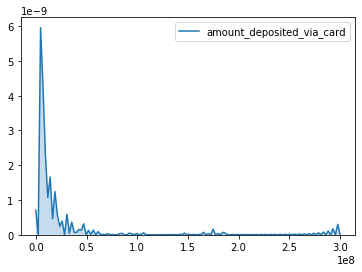

In [481]:
sns.kdeplot(df[df.complained == "NO"].amount_deposited_via_card , shade=True)

<strong>balance_on_complaign_date:</strong> Complaint customers have relatively higher balance on complaint date. Having higher balance might be the cause of complaints compaired to when customers have lower balance.

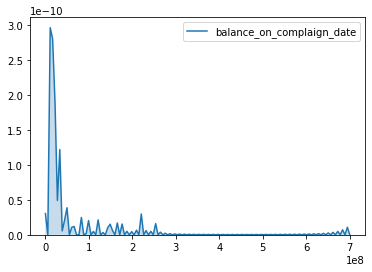

In [482]:
sns.kdeplot(df[df.complained == "YES"].balance_on_complaign_date , shade=True)

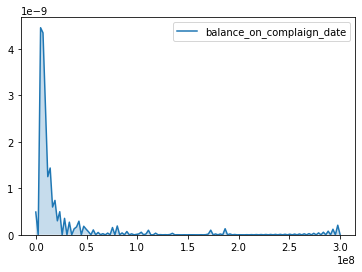

In [483]:
sns.kdeplot(df[df.complained == "NO"].balance_on_complaign_date , shade=True)

<strong>transaction_date:</strong> A date of actual transaction by the customer <br>
<strong>complaint_date:</strong> A snapshot date for which stats were collected to see how many customers had complained and how many not

As seen below: 25th April had the most complaints recorded on a single day. It was a <strong>Tuesday</strong>. But in aggregate <strong>Wednesdays</strong> have the most complaints. <strong>Sundays</strong> have least complaints.

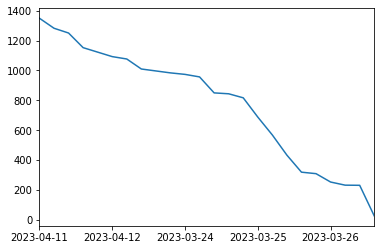

In [484]:
# Total number of transactions by day

df[df.complained == "YES"].transaction_date.value_counts().plot()

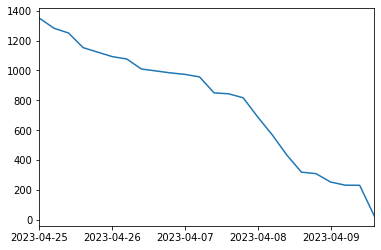

In [485]:
# Complaints frequency by day

df[df.complained == "YES"].complaint_date.value_counts().plot()

As seen below, cummulatively more complaints were registered on Wednesday. This may not necessarily mean Wednesday are complaint days. The dataset given has some days skipped. The model will let us know if day of week have significant impact to complaints.

In [486]:
complain_stats = pd.to_datetime(df[df.complained == "YES"].complaint_date.values).day_name().values
unique, frequency = np.unique(complain_stats, return_counts = True)

complain_stats=pd.DataFrame(frequency, unique).reset_index()

complain_stats=complain_stats.rename(columns = {'index':'days', 0:'counts'})
complain_stats

,days,counts
0,Friday,3643
1,Monday,2635
2,Saturday,1256
3,Sunday,485
4,Thursday,3130
5,Tuesday,3650
6,Wednesday,4023


<strong>amount:</strong> It is clear from kernel distribution plots below that complaint instances are linked to significantly higher amounts compared to non complaint instances.

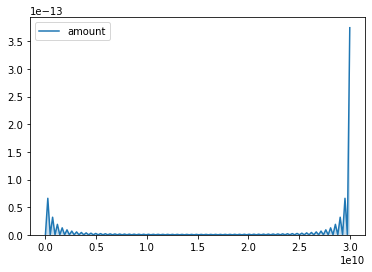

In [487]:
sns.kdeplot(df[df.complained == "YES"].amount , shade=True)

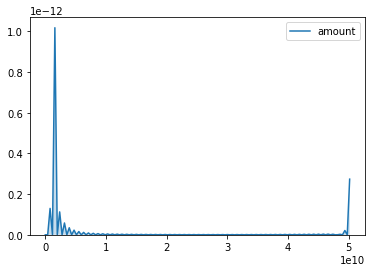

In [488]:
sns.kdeplot(df[df.complained == "NO"].amount , shade=True)

<strong>quantity:</strong> Complaint instances also seem to be attached to relatively larger quantities. 

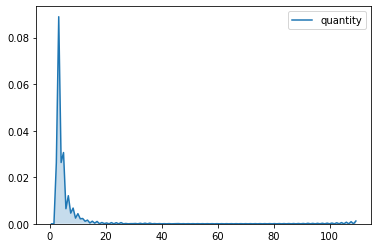

In [489]:
sns.kdeplot(df[df.complained == "YES"].quantity , shade=True)

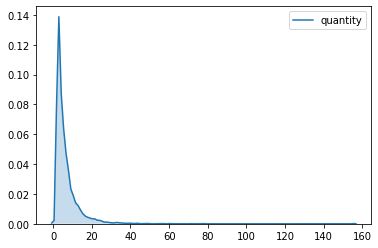

In [490]:
sns.kdeplot(df[df.complained == "NO"].quantity , shade=True)

<strong> card-vendor:</strong> About 93% of complaints cases are linked to Visa. Looking at distribution for non-complaint cases we learn that using Visa does not necessarily guarantee a customer will complain. Generally it's just that the dataset has more Visa users that Mastercard users.

In [491]:
df[df.complained == "YES"].card_vendor.value_counts()

Visa          17420
Mastercard     1402
Name: card_vendor, dtype: int64

In [492]:
df[df.complained == "NO"].card_vendor.value_counts()

Visa          10718
Mastercard     1923
Name: card_vendor, dtype: int64

<strong>used_coupon:</strong> This is same as above. Not being a coupon user does not necessarily guarantee a customer will complain or not. We will determine its importance from the model.

In [493]:
df[df.complained == "YES"].used_coupon.value_counts()

No     18475
Yes      347
Name: used_coupon, dtype: int64

In [494]:
df[df.complained == "NO"].used_coupon.value_counts()

No     11837
Yes      804
Name: used_coupon, dtype: int64

<strong>product_discounted:</strong>

In [495]:
df[df.complained == "YES"].product_discounted.value_counts()

no     17289
YEs     1533
Name: product_discounted, dtype: int64

In [496]:
df[df.complained == "NO"].product_discounted.value_counts()

no     10509
YEs     2132
Name: product_discounted, dtype: int64

<strong>cust_age:</strong> Median age for both complaint and non-complaint customers is 49.

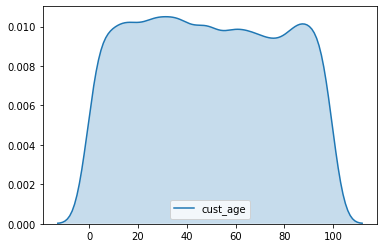

In [497]:
sns.kdeplot(df[df.complained == "YES"].cust_age , shade=True)

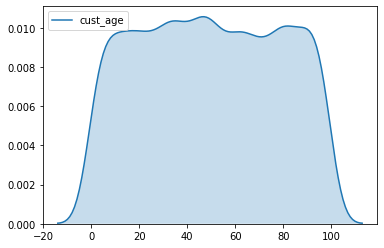

In [498]:
sns.kdeplot(df[df.complained == "NO"].cust_age , shade=True)

In [499]:
np.median(df[df.complained == "YES"].cust_age)

49.0

In [500]:
np.median(df[df.complained == "NO"].cust_age)

49.0

Preparing dataframe ready for Fitting

### 4. Feature Engineering

<strong>Feature Scaling:</strong> Because we are going to use Random Forest which is not sensitive to outliers, feature scaling is not necessary. If we were to use another model that is sensitive to outliers we would need to scale features associated with outliers in our dataset eg: amount, quantity

<strong>Dimensionality Reduction:</strong> From EDA we have learned that not all features are needed to train the model/discover patterns. Here we will try to remove those that are not relevant.

In [501]:
# Remove customer registration number. This feature would only cause overfitting
df_eng = df.drop(columns=['customer_registration_number'])

<strong>Feature Extraction:</strong> Some features will need to be combined to result into more meaningful features

In [502]:
# Instead of having dates we can try to know how long before customer file complaints from transaction date
duration = (pd.to_datetime(df.complaint_date) - pd.to_datetime(df.transaction_date)).dt.days

df_eng.insert(df.columns.get_loc("complaint_date"), 'days_until_complaint', duration)

In [503]:
# Also, we can add info to know which day complaint was filed

day = pd.to_datetime(df.complaint_date).dt.day_name()

df_eng.insert(df.columns.get_loc("complaint_date"), 'complaint_day', day)

In [504]:
# Removing date columns

df_eng.drop(columns=['transaction_date', 'complaint_date'], inplace=True)

<strong>Feature Encoding:</strong> To improve performance it's best to work with numeric datatypes. 

In [505]:
df_eng.Order_tyPe.unique()

array(['Other', 'Pickup', 'Walk In', 'Order via website',
       'sender_mno_Airtel', 'via app', 'sender_mno_TTCL'], dtype=object)

In [506]:
# Encode using integer values 1 to 7
df_eng.Order_tyPe.replace("Other", 1, inplace=True)
df_eng.Order_tyPe.replace("Pickup", 2, inplace=True)
df_eng.Order_tyPe.replace("Walk In", 3, inplace=True)
df_eng.Order_tyPe.replace("Order via website", 4, inplace=True)
df_eng.Order_tyPe.replace("sender_mno_Airtel", 5, inplace=True)
df_eng.Order_tyPe.replace("via app", 6, inplace=True)
df_eng.Order_tyPe.replace("sender_mno_TTCL", 7, inplace=True)

In [507]:
df_eng.Order_tyPe.unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [508]:
# Change all features with Yes and No to uppercase
df_eng.complained = df_eng.complained.apply(str.upper)
df_eng.used_coupon = df_eng.used_coupon.apply(str.upper)
df_eng.product_discounted = df_eng.product_discounted.apply(str.upper)

In [509]:
# Replace all Yes with 1
df_eng.complained.replace("YES", 1, inplace=True)
df_eng.used_coupon.replace("YES", 1, inplace=True)
df_eng.product_discounted.replace("YES", 1, inplace=True)

In [510]:
# Replace all No's with 0
df_eng.complained.replace("NO", 0, inplace=True)
df_eng.used_coupon.replace("NO", 0, inplace=True)
df_eng.product_discounted.replace("NO", 0, inplace=True)

In [511]:
# Encode complaints days
df_eng.complaint_day.replace("Monday", 1, inplace=True)
df_eng.complaint_day.replace("Tuesday", 2, inplace=True)
df_eng.complaint_day.replace("Wednesday", 3, inplace=True)
df_eng.complaint_day.replace("Thursday", 4, inplace=True)
df_eng.complaint_day.replace("Friday", 5, inplace=True)
df_eng.complaint_day.replace("Saturday", 6, inplace=True)
df_eng.complaint_day.replace("Sunday", 7, inplace=True)

In [512]:
# Encode card vendor

df_eng.card_vendor.replace("Visa", 1, inplace=True)
df_eng.card_vendor.replace("Mastercard", 2, inplace=True)

In [513]:
# Encode gender
df_eng.cust_gender.replace("Female", 1, inplace=True)
df_eng.cust_gender.replace("Male", 2, inplace=True)

In [514]:
# We now have a clean dataframe ready for train
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31463 entries, 0 to 31923
Data columns (total 20 columns):
amount_deposited_via_counter    31463 non-null float64
amount_deposited_via_card       31463 non-null float64
balance_on_complaign_date       31463 non-null float64
complaint_day                   31463 non-null int64
days_until_complaint            31463 non-null int64
restaurant_points               31463 non-null int64
fuel_points                     31463 non-null int64
groceries_points                31463 non-null int64
toys_points                     31463 non-null int64
cash_back_points                31463 non-null int64
electronics                     31463 non-null int64
complained                      31463 non-null int64
Order_tyPe                      31463 non-null int64
amount                          31463 non-null float64
quantity                        31463 non-null float64
card_vendor                     31463 non-null int64
used_coupon                     3

### 5. Model Fitting

In [515]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [516]:
# Copy the dataframe
df_rd = df_eng.copy()

In [517]:
df_rd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31463 entries, 0 to 31923
Data columns (total 20 columns):
amount_deposited_via_counter    31463 non-null float64
amount_deposited_via_card       31463 non-null float64
balance_on_complaign_date       31463 non-null float64
complaint_day                   31463 non-null int64
days_until_complaint            31463 non-null int64
restaurant_points               31463 non-null int64
fuel_points                     31463 non-null int64
groceries_points                31463 non-null int64
toys_points                     31463 non-null int64
cash_back_points                31463 non-null int64
electronics                     31463 non-null int64
complained                      31463 non-null int64
Order_tyPe                      31463 non-null int64
amount                          31463 non-null float64
quantity                        31463 non-null float64
card_vendor                     31463 non-null int64
used_coupon                     3

<strong>Stratified Random Sampling (SRS):</strong> Preparing train and test data. We use SRS to maintain distribution of outcome variable in train and test

In [518]:
# First we need to have our data split into train and test. 

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) # Create a split instance 
for train_index, test_index in split.split(df_rd, df_rd["complained"]):
    strat_train_set = df_rd.iloc[train_index]
    strat_test_set = df_rd.iloc[test_index]

<strong>Model Fitting:</strong> We are going to fit our dataset on a Random Forest algorithm. <br>
Instead of pre-defining model's hyperparameters we are going to use grid search to get the best hyperperameters

In [519]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params={
   'max_depth': [2,3,5,10,20],
   'min_samples_leaf': [5,10,20,50,100,200],
   'n_estimators': [10, 25, 30, 50, 100, 200]
}

# Hyperparameter tuning with GridSearch

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=rf,
                          param_grid=params,
                          cv=4,
                          n_jobs=-1, verbose=1, scoring="accuracy")

In [520]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   53.0s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  1.7min finished


Wall time: 1min 44s


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_

### 6. Model Evaluation

In [521]:
# Using out of bag score the model communicates how well it has learned
print ("OOB: ", round(grid_search.best_score_*100, 0), "%")

OOB:  80.0 %


In [522]:
# Getting best estimator details from Grid search
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

<strong>Feature Importance: </strong> To know which feature had more weight or had strong correlation to outcome variable (complain) see below:

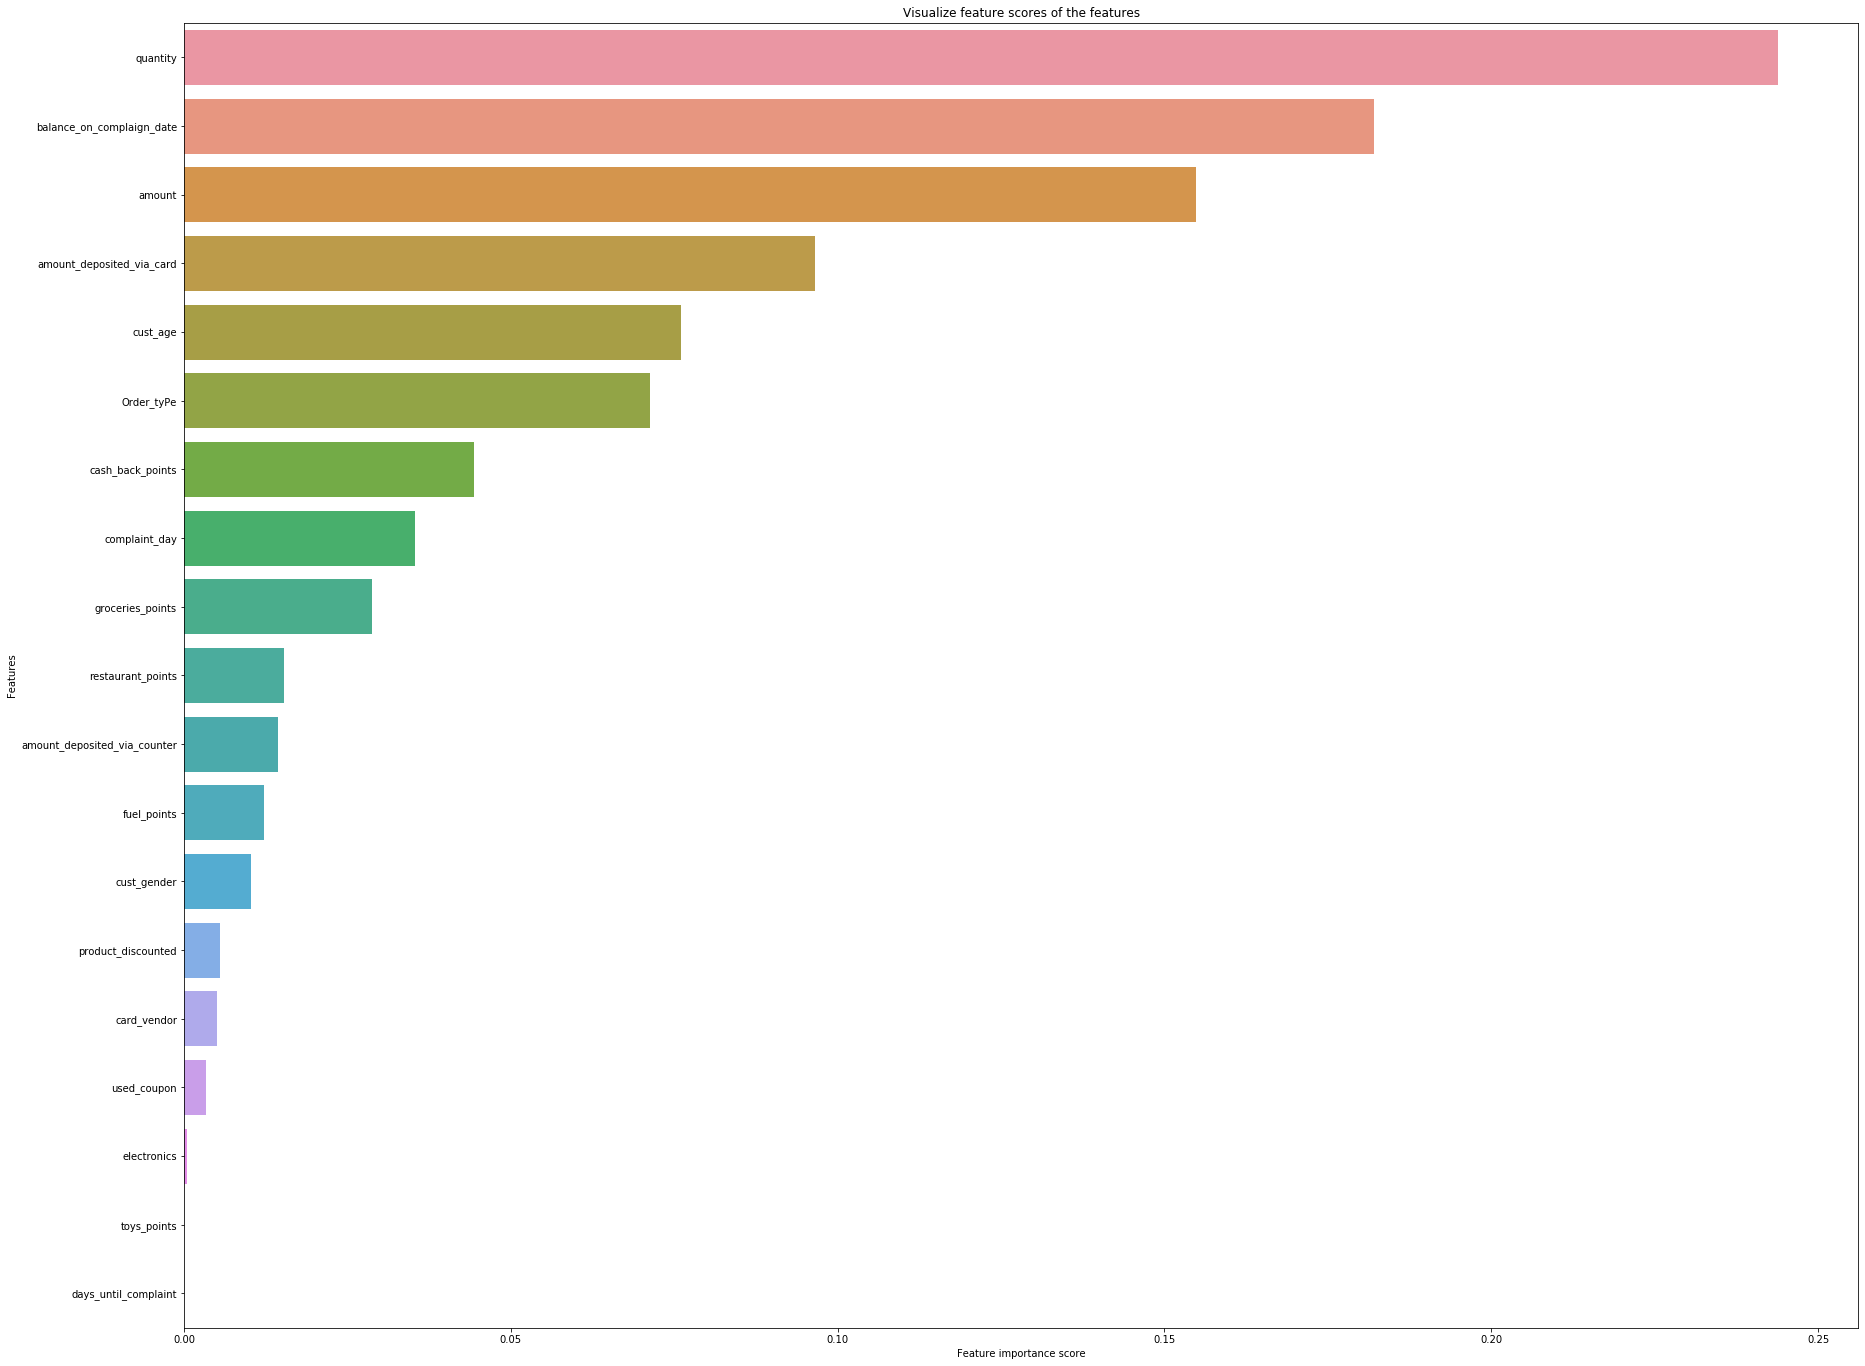

In [523]:
# View Feature Importance scores

feature_scores = pd.Series(grid_search.best_estimator_.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=df)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

Adding context to the results using <strong>Confusion Matrix</strong>

In [524]:
X_test = strat_test_set.loc[:, strat_test_set.columns!='complained']

y_pred_rf = grid_search.predict(X_test)

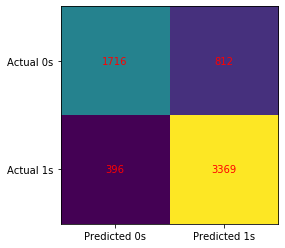

In [525]:
# Plot confusion matrix

cm = confusion_matrix(strat_test_set['complained'], y_pred_rf)

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [526]:
# Classification report
print(classification_report(strat_test_set['complained'], y_pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74      2528
           1       0.81      0.89      0.85      3765

    accuracy                           0.81      6293
   macro avg       0.81      0.79      0.79      6293
weighted avg       0.81      0.81      0.80      6293



<strong>Conclusion:</strong> From the dataset given, we have developed a Random Forest model that can predict a complaint when there is one by <strong>81%</strong> accuracy. 